# Import all neccessary packages

In [23]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm

from PIL import Image

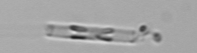

In [25]:
img = Image.open('./DeepLearningProject/Pythoplankton_image_Data/diatom_flagellate/IFCB5_2012_192_163711_04605.png')
img

In [16]:
size = np.array(img)
size.shape

(53, 197)

In [17]:
from skimage.io import imread

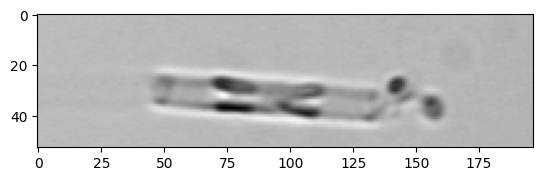

In [95]:
im = imread('./DeepLearningProject/Pythoplankton_image_Data/diatom_flagellate/IFCB5_2012_192_163711_04605.png', as_gray = True)
plt.imshow(im, cmap=cm.gray)
plt.show()

In [96]:
im.shape

(53, 197)

In [27]:
# let's see how the image looks like when its downscale to 25x25 resolution

from skimage.transform import resize

maxPixel = 25
image = resize(im, (maxPixel, maxPixel))


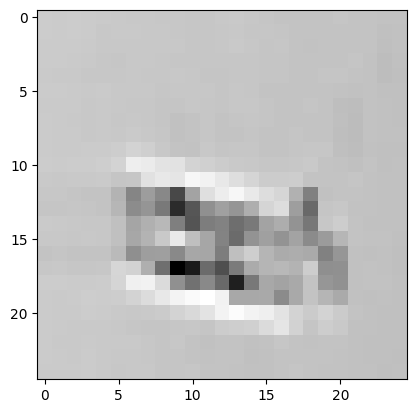

In [29]:
plt.imshow(image, cmap=cm.gray)
plt.show()

In [30]:
# height = 100
# width = 100

# transform = transforms.Compose([
#     transforms.Resize((height, width)),  # Resize images to a fixed size
#     transforms.ToTensor(),  # Convert images to PyTorch tensors
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
#     # You can add more transformations here for data augmentation
# ])

In [350]:
# we are using IOmageFolder to see how our dataset looks like in proper labeled manner. This is why we are not using any transform right now.
dataset = datasets.ImageFolder(root='./DeepLearningProject/Pythoplankton_image_Data/', transform=None)

In [352]:
# the following will show you how much datapoints the folder phytoplankton have, datapoint means image.
dataset

Dataset ImageFolder
    Number of datapoints: 3563596
    Root location: ./DeepLearningProject/Pythoplankton_image_Data/

In [355]:
# store all the label corresponding to the classes
classes = dataset.class_to_idx

In [356]:
# let's see how many images each label have and store it in label_count variable for future use.

import os

#common root path to all the classes
data_path = './DeepLearningProject/Pythoplankton_image_Data'

label_counts = {}


for j, label in enumerate(os.listdir(data_path)):
    
    if os.path.isdir(os.path.join(data_path, label)):
        # Count the number of files in each label's directory
        label_counts[label] = len(os.listdir(os.path.join(data_path, label)))


In [357]:
# number of olders inside that directory
# next(os.walk(data_path))[1][0]

# see how many images each label have
label_counts

{'Didinium_sp': 25,
 'Gonyaulax': 564,
 'Odontella': 86,
 'Strombidium_wulffi': 157,
 'Tontonia_gracillima': 361,
 'detritus': 378502,
 'Thalassiosira': 13139,
 'Leptocylindrus_mediterraneus': 392,
 'pennate_morphotype1': 238,
 'Akashiwo': 6,
 'G_delicatula_detritus': 816,
 'Tontonia_appendiculariformis': 46,
 'Lauderia': 295,
 'G_delicatula_parasite': 2965,
 'pennates_on_diatoms': 851,
 'pollen': 19,
 'Proterythropsis_sp': 665,
 'Skeletonema': 17454,
 'Tiarina_fusus': 13,
 'Paralia': 667,
 'Hemiaulus': 18,
 'dino_large1': 181,
 'Pyramimonas_longicauda': 616,
 'Euplotes_sp': 25,
 'DactFragCerataul': 5907,
 'kiteflagellates': 525,
 'Chrysochromulina': 516,
 'Strobilidium_morphotype1': 250,
 'Strombidium_morphotype1': 726,
 'Leptocylindrus': 125690,
 'Phaeocystis': 2388,
 'Stephanopyxis': 57,
 'zooplankton': 64,
 'Katodinium_or_Torodinium': 395,
 'diatom_flagellate': 729,
 'Strombidium_oculatum': 152,
 'bad': 9965,
 'Bacillaria': 14,
 'Thalassiosira_dirty': 2183,
 'Pleuronema_sp': 115,
 

In [83]:
# len(os.listdir(os.path.join(data_path, next(os.walk(data_path))[1][6])))


13139

In [360]:
# you can see items inside the dictionary using items() attribute

label_counts.items()

dict_items([('Didinium_sp', 25), ('Gonyaulax', 564), ('Odontella', 86), ('Strombidium_wulffi', 157), ('Tontonia_gracillima', 361), ('detritus', 378502), ('Thalassiosira', 13139), ('Leptocylindrus_mediterraneus', 392), ('pennate_morphotype1', 238), ('Akashiwo', 6), ('G_delicatula_detritus', 816), ('Tontonia_appendiculariformis', 46), ('Lauderia', 295), ('G_delicatula_parasite', 2965), ('pennates_on_diatoms', 851), ('pollen', 19), ('Proterythropsis_sp', 665), ('Skeletonema', 17454), ('Tiarina_fusus', 13), ('Paralia', 667), ('Hemiaulus', 18), ('dino_large1', 181), ('Pyramimonas_longicauda', 616), ('Euplotes_sp', 25), ('DactFragCerataul', 5907), ('kiteflagellates', 525), ('Chrysochromulina', 516), ('Strobilidium_morphotype1', 250), ('Strombidium_morphotype1', 726), ('Leptocylindrus', 125690), ('Phaeocystis', 2388), ('Stephanopyxis', 57), ('zooplankton', 64), ('Katodinium_or_Torodinium', 395), ('diatom_flagellate', 729), ('Strombidium_oculatum', 152), ('bad', 9965), ('Bacillaria', 14), ('Th

In [145]:
# the following code is to see the largest height and width of the image in any class folder, however it's highly slow and need to parallelized.


# j = 1
# img = []
# for i, image in enumerate(os.listdir(os.path.join(data_path, os.listdir(data_path)[j]))):
#     if i > 0:
#         image_path = os.path.join(data_path, os.listdir(data_path)[j], os.listdir(os.path.join(data_path, os.listdir(data_path)[j]))[i])
#         img.append((imread(image_path)).shape)
        
# img = np.array(img)        
# print('max height: ', np.max(img[:,0]), 'max width: ', np.max(img[:,1]))

max height:  270 max width:  422


# Data Filtering

In [277]:
# trying to remove dataset with image greater than 600 and less than 500 

keys1 = []
keys2 = []
keys3 = []
keys4 = []

for key, values in label_counts.items():
    if 300 < values <= 500:
        keys1.append(key)
    elif 500 < values <= 700:
        keys2.append(key)
    elif 700 < values < 1415:
        keys3.append(key)
    elif 7000 < values :
        keys4.append(key)

In [278]:
print('keys1: ', keys1)
print('keys2: ', keys2)
print('keys3: ', keys3)
print('keys4: ', keys4)

keys1:  ['Tontonia_gracillima', 'Leptocylindrus_mediterraneus', 'Katodinium_or_Torodinium', 'G_delicatula_external_parasite', 'Delphineis', 'bead', 'Strombidium_morphotype2', 'Licmophora', 'Dinophysis', 'spore']
keys2:  ['Gonyaulax', 'Proterythropsis_sp', 'Paralia', 'Pyramimonas_longicauda', 'kiteflagellates', 'Chrysochromulina', 'Chaetoceros_didymus', 'Ephemera', 'Gyrodinium']
keys3:  ['G_delicatula_detritus', 'pennates_on_diatoms', 'Strombidium_morphotype1', 'diatom_flagellate', 'Euglena', 'Chaetoceros_pennate', 'Coscinodiscus', 'Guinardia_flaccida', 'Heterocapsa_triquetra', 'Ceratium']
keys4:  ['detritus', 'Thalassiosira', 'Skeletonema', 'Leptocylindrus', 'bad', 'mix', 'Guinardia_delicatula', 'Rhizosolenia', 'Dactyliosolen', 'Cerataulina', 'Ciliate_mix', 'Dinobryon', 'Cylindrotheca', 'mix_elongated', 'Chaetoceros', 'dino30']


In [201]:
keys1_idx = []

for key in keys1:
    print(classes[key])
    keys1_idx.append(key)

82
50
45
35
22
85
73
51
26
101


In [361]:
image, label = dataset[82]

np.shape(image) # as you can see it's not torch tensor object yet!!

(79, 188, 3)

# Defining Custom Dataset class for creating selected class dataset according to our need

In [362]:
# from torch.utils.data import Dataset, DataLoader

class CustomPhytoplanktonDataset(Dataset):
    
    def __init__(self, folder_paths, transform=None):
        """
        Args:
            folder_paths (list): List of strings with paths to folders.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.folder_paths = folder_paths
        self.transform = transform
        self.images = []
        self.labels = []
        self.class_name = []

        self._load_dataset()


                    
    def _load_dataset(self):
        # Supported image file extensions
        image_extensions = {'.jpg', '.jpeg', '.png'}

        # Iterate through all the provided folder paths
        for idx, folder_path in enumerate(self.folder_paths):
            
            # Assuming folder names are the class labels
            
            class_name = os.path.basename(folder_path)
            
            for image_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_file)
                _, ext = os.path.splitext(image_path)  # Extract the file extension
                if os.path.isfile(image_path) and ext.lower() in image_extensions:
                    # Store the image path and its class label
                    self.images.append(image_path)
                    self.labels.append(idx)  # idx, or class name if you prefer numerical labels
                    self.class_name.append(class_name)
               

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        
        # Load image and label from the stored path and label
        
        image_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert('RGB')  # Convert to RGB to ensure 3 channels

        if self.transform:
            image = self.transform(image)
        return image, label
            
    def __repr__(self):
        format_string = 'Custom Dataset \n'
        format_string += '    Number of datapoints: {}\n'.format(self.__len__())
        format_string += '    Name of classes: {}\n'.format(set(self.class_name))
        format_string += '    Root location: {}\n'.format(os.path.commonpath(self.folder_paths))
        format_string += '    StandardTransform\n'
        format_string += 'Transform: {}\n'.format(self.transform.__repr__().replace('\n', '\n    '))
        return format_string
    
        


In [363]:
# Define your transform
# 224 * 224 because that's the required size of the input in VGG19 model

Height, Width = 224, 224

transform = transforms.Compose([
    transforms.Resize((Height, Width)),
    transforms.ToTensor(),
    # Add any other transformations here
])

# List of folder paths
folder_paths1 = []
for key in keys1:
    folder_paths1.append(data_path + '/' + key)
    
    
folder_paths2 = []
for key in keys2:
    folder_paths2.append(data_path + '/' + key)
    
folder_paths3 = []
for key in keys3:
    folder_paths3.append(data_path + '/' + key)
    

    
# Create an instance of your custom dataset
dataset1 = CustomPhytoplanktonDataset(folder_paths1, transform = transform)

dataset2 = CustomPhytoplanktonDataset(folder_paths2, transform = transform)

dataset3 = CustomPhytoplanktonDataset(folder_paths3, transform = transform)


In [364]:
dataset1

Custom Dataset 
    Number of datapoints: 3739
    Name of classes: {'spore', 'Leptocylindrus_mediterraneus', 'G_delicatula_external_parasite', 'Strombidium_morphotype2', 'Licmophora', 'Delphineis', 'Dinophysis', 'bead', 'Katodinium_or_Torodinium', 'Tontonia_gracillima'}
    Root location: DeepLearningProject/Pythoplankton_image_Data
    StandardTransform
Transform: Compose(
        Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
        ToTensor()
    )

In [365]:
dataset2

Custom Dataset 
    Number of datapoints: 5363
    Name of classes: {'Gyrodinium', 'Ephemera', 'Paralia', 'Chrysochromulina', 'Pyramimonas_longicauda', 'kiteflagellates', 'Proterythropsis_sp', 'Chaetoceros_didymus', 'Gonyaulax'}
    Root location: DeepLearningProject/Pythoplankton_image_Data
    StandardTransform
Transform: Compose(
        Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
        ToTensor()
    )

In [366]:
dataset3

Custom Dataset 
    Number of datapoints: 9053
    Name of classes: {'Heterocapsa_triquetra', 'Ceratium', 'diatom_flagellate', 'Coscinodiscus', 'Euglena', 'Strombidium_morphotype1', 'G_delicatula_detritus', 'pennates_on_diatoms', 'Chaetoceros_pennate', 'Guinardia_flaccida'}
    Root location: DeepLearningProject/Pythoplankton_image_Data
    StandardTransform
Transform: Compose(
        Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
        ToTensor()
    )

# Visualize our dataset1

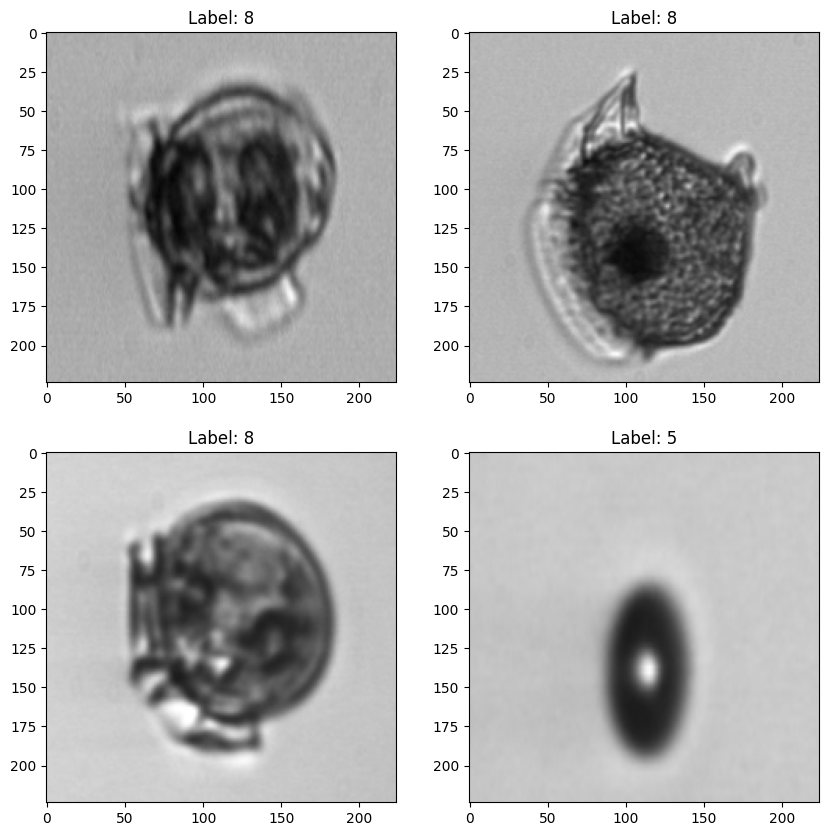

In [368]:
# Assume 'dataset' is your dataset instance and you want to display the first image
image1, label1 = dataset1[3230]  # Get the first image and its label
image2, label2 = dataset1[3130]
image3, label3 = dataset1[3030]
image4, label4 = dataset1[2230]


# Convert the tensor to a NumPy array
# PyTorch tensors for images are usually in C x H x W format (channels, height, width)
# matplotlib expects images in H x W x C format, so we need to transpose the axes
image1, image2, image3, image4 = image1.numpy().transpose((1, 2, 0)), image2.numpy().transpose((1, 2, 0)), image3.numpy().transpose((1, 2, 0)), image4.numpy().transpose((1, 2, 0))

# # If your dataset includes a normalization transform, you might need to unnormalize the image
# mean = np.array([0.485, 0.456, 0.406])
# std = np.array([0.229, 0.224, 0.225])
# image = std * image + mean
# image = np.clip(image, 0, 1)  # Clip values to be between 0 and 1

# Display the image
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(image1)
ax[0,0].set_title(f'Label: {label1}')
ax[0,1].imshow(image2)
ax[1,0].imshow(image3)
ax[1,1].imshow(image4)
ax[0,1].set_title(f'Label: {label2}')
ax[1,0].set_title(f'Label: {label3}')
ax[1,1].set_title(f'Label: {label4}')
plt.show()

In [369]:
# Sample code to pad your image with zero

In [298]:
image = np.array([[1,2,3],[4,5,6],[7,8,9]])
image

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [305]:
def padding(image, size):
    shape = np.shape(image)
    new_image = np.zeros(size)
    new_image[0:np.shape(image)[0],0:np.shape(image)[1]] = new_image[0:np.shape(image)[0],0:np.shape(image)[1]] + image
    return new_image

In [306]:
padding(image, (8,8))

array([[1., 2., 3., 0., 0., 0., 0., 0.],
       [4., 5., 6., 0., 0., 0., 0., 0.],
       [7., 8., 9., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

# Training and validate split

In [370]:
# define the size of the training and validating dataset

train_size = int(0.8*len(dataset1))
validate_size = int(len(dataset1) - train_size)

train_data, test_data = torch.utils.data.random_split(dataset1, [train_size, validate_size])

In [371]:
train_size, validate_size

(2991, 748)

# DataLoader to create a iterator to your dataset

In [372]:
# create dataloader to load your data
batch_size = 64


train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size = batch_size, 
                                           shuffle = True,
                                           # num_workers = 2)
                                          )

validate_loader = torch.utils.data.DataLoader(test_data, 
                                              batch_size = batch_size,
                                              shuffle = False,
                                              # num_workers = 2)
                                             )
                         

images.shape: torch.Size([64, 3, 224, 224])


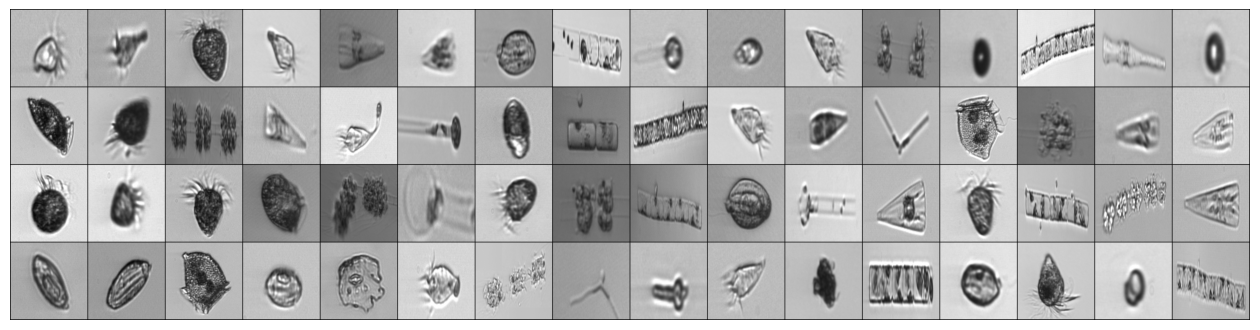

In [373]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    # After using make_grid, you get a grid tensor of shape [C, H, W]
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0))) # We need to change it to [H, W, C] for matplotlib
    break

In [328]:
sample_image = iter(train_loader)

first_batch_samples,first_batch_labels = next(sample_image)
print(first_batch_samples.shape) #64 batch size, 1 channel, width 224 , height 224
print(first_batch_labels)

torch.Size([64, 3, 224, 224])
tensor([2, 7, 9, 0, 0, 4, 2, 5, 6, 2, 3, 6, 9, 5, 6, 4, 9, 0, 0, 3, 5, 0, 6, 1,
        6, 5, 8, 8, 3, 8, 5, 2, 3, 3, 2, 2, 5, 9, 3, 9, 8, 4, 3, 7, 3, 1, 3, 0,
        8, 0, 0, 2, 8, 0, 8, 9, 2, 4, 0, 9, 5, 4, 9, 7])


## Visualize first batch of data

Batch shape: torch.Size([64, 3, 224, 224])


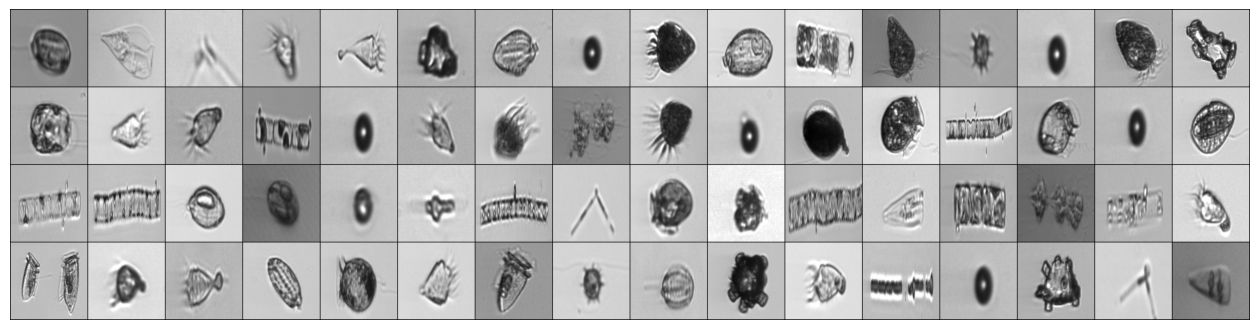

In [334]:
# Check the shape of the entire batch
print('Batch shape:', first_batch_samples.shape)

# Create a grid of images
grid = make_grid(first_batch_samples, nrow=16)  # Adjust 'nrow' to how many images you want per row

# Permute and normalize the grid for display
grid = grid.permute(1, 2, 0)  # Change from [C, H, W] to [H, W, C]
plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(grid.numpy())
plt.show()

In [329]:
second_batch_samples,second_batch_labels = next(sample_image)
print(second_batch_samples.shape) #64 batch size, 1 channel, width 224 , height 224
print(second_batch_labels)

torch.Size([64, 3, 224, 224])
tensor([1, 9, 7, 2, 8, 7, 8, 1, 5, 4, 2, 4, 8, 2, 4, 1, 5, 3, 2, 7, 0, 9, 7, 2,
        4, 9, 9, 1, 4, 2, 4, 3, 6, 0, 1, 1, 0, 7, 8, 5, 0, 5, 2, 4, 9, 2, 2, 8,
        0, 4, 1, 0, 1, 1, 8, 9, 2, 9, 9, 9, 1, 3, 6, 0])


## Visualize second batch of data

Batch shape: torch.Size([64, 3, 224, 224])


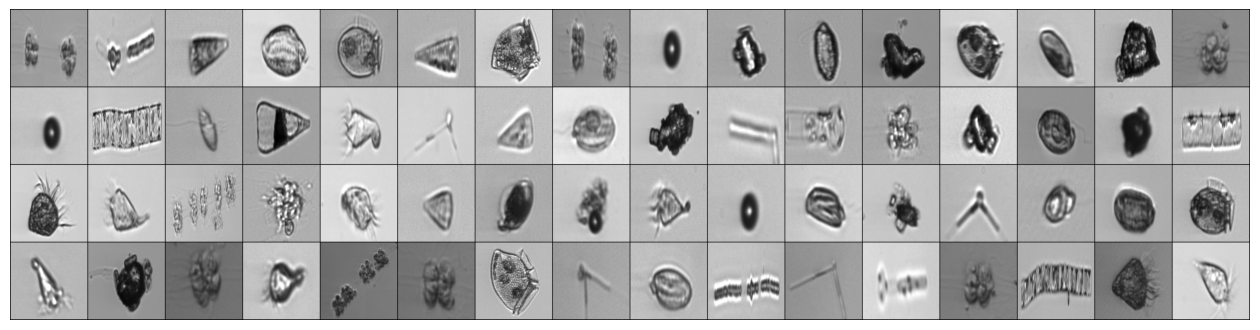

In [335]:
# Check the shape of the entire batch
print('Batch shape:', second_batch_samples.shape)

# Create a grid of images
grid = make_grid(second_batch_samples, nrow=16)  # Adjust 'nrow' to how many images you want per row

# Permute and normalize the grid for display
grid = grid.permute(1, 2, 0)  # Change from [C, H, W] to [H, W, C]
plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(grid.numpy())
plt.show()

In [374]:
# see how many batches are there

import math
# total number of batch size
total_data = len(dataset1)
batch_size = train_loader.batch_size

print("total number of batch size: ", math.ceil(total_data/batch_size))

total number of batch size:  59


# Defining Model 

In [338]:
#how the maxpool works while we are preserving the shape in blocks by padding (1,1)
'''
    x = (width- kernel_size +2P) /S +1
    where P= padding
    S= strides
'''
import math
block1 =224
pool1 =math.ceil((block1-3)/2 +1)
print(pool1)


block2=pool1

pool2 =math.ceil((block2-3)/2 +1)
print(pool2)



block3=pool2
pool3 =math.ceil((block3-3)/2 +1)
print(pool3)

block4=pool3
pool4 = math.ceil((block4 -3)/2 +1)
print(pool4)

block5=pool4
pool5 =math.ceil((block5-3)/2 +1)
print(pool5)


#After flatten 
flatten= pool5 * pool5 * 512
print(f'After flatten:: {flatten}')

112
56
28
14
7
After flatten:: 25088


In [375]:
import torch.nn as nn
import torch.nn.functional as F

# Instantiate the network
net = VGG16_NET()

# Freeze all layers except the last fully connected layers
for name, param in net.named_parameters():
    if 'fc16' not in name:
        param.requires_grad = False

# Check the layers to confirm which are frozen and which are not
for name, param in net.named_parameters():
    print(f"{name} is {'trainable' if param.requires_grad else 'frozen'}")

conv1.weight is frozen
conv1.bias is frozen
conv2.weight is frozen
conv2.bias is frozen
conv3.weight is frozen
conv3.bias is frozen
conv4.weight is frozen
conv4.bias is frozen
conv5.weight is frozen
conv5.bias is frozen
conv6.weight is frozen
conv6.bias is frozen
conv7.weight is frozen
conv7.bias is frozen
conv8.weight is frozen
conv8.bias is frozen
conv9.weight is frozen
conv9.bias is frozen
conv10.weight is frozen
conv10.bias is frozen
conv11.weight is frozen
conv11.bias is frozen
conv12.weight is frozen
conv12.bias is frozen
conv13.weight is frozen
conv13.bias is frozen
fc14.weight is frozen
fc14.bias is frozen
fc15.weight is frozen
fc15.bias is frozen
fc16.weight is trainable
fc16.bias is trainable


In [347]:
num_epochs=50
lr=1e-4          #learning rate

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
model = net
model = model.to(device=device) 
load_model = True

optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=lr)
criterion = nn.CrossEntropyLoss()


In [349]:
for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0
    
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(images)
        loss = criterion(scores,labels)
        loss.backward()
        optimizer.step()
        loss_var += loss.item()
        if idx%64==0:
            print(f'Epoch [{epoch+1}/{num_epochs}] || Step [{idx+1}/{len(train_loader)}] || Loss:{loss_var/len(train_loader)}')
    print(f"Loss at epoch {epoch+1} || {loss_var/len(train_loader)}")

    with torch.no_grad():
        correct = 0
        samples = 0
        for idx, (images, labels) in enumerate(validate_loader):
            images = images.to(device=device)
            labels = labels.to(device=device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum()
            samples += preds.size(0)
        print(f"accuracy {float(correct) / float(samples) * 100:.2f} percentage || Correct {correct} out of {samples} samples")

Epoch [1/50] || Step [1/47] || Loss:0.04914740298656707
Loss at epoch 1 || 2.298856111282998
accuracy 10.83 percentage || Correct 81 out of 748 samples
Epoch [2/50] || Step [1/47] || Loss:0.049279923134661736
Loss at epoch 2 || 2.2994871545345226
accuracy 10.83 percentage || Correct 81 out of 748 samples
Epoch [3/50] || Step [1/47] || Loss:0.04927791940405014


KeyboardInterrupt: 